In [37]:
import pandas as pd
df=pd.read_excel('Sales CoGS.xlsx')
df

,Unnamed: 0,2017-12-31 00:00:00,2018-12-31 00:00:00,2019-12-31 00:00:00
0,Sales,1000,1200,1100
1,Cost of Goods Sold,620,700,650


In [38]:
df=pd.read_excel('Sales CoGS.xlsx',index_col=0)
df.head()

,2017-12-31,2018-12-31,2019-12-31
Sales,1000,1200,1100
Cost of Goods Sold,620,700,650


In [39]:
df.T

,Sales,Cost of Goods Sold
2017-12-31,1000,620
2018-12-31,1200,700
2019-12-31,1100,650


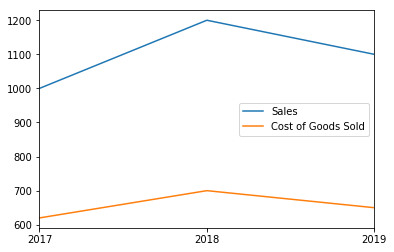

In [40]:
%matplotlib inline
df.T.plot.line()

In [41]:
last_date=df.columns.max()
last_date

Timestamp('2019-12-31 00:00:00')

In [42]:
fcst_sales=df.loc['Sales'][last_date]
fcst_cogs=df.loc['Cost of Goods Sold'][last_date]
print(f'The forecasted value for sales is ${fcst_sales:,.0f} and for COGS is ${fcst_cogs:,.0f}')

The forecasted value for sales is $1,100 and for COGS is $650


In [43]:
#Forecast Using Trend
#Trend Method1:By Regression
for_fcst_df=pd.DataFrame(df.loc['Sales'])
for_fcst_df

,Sales
2017-12-31,1000
2018-12-31,1200
2019-12-31,1100


In [44]:
for_fcst_df=for_fcst_df.reset_index(drop=True)
for_fcst_df

,Sales
0,1000
1,1200
2,1100


In [45]:
for_fcst_df=for_fcst_df.reset_index(drop=True)
for_fcst_df

,Sales
0,1000
1,1200
2,1100


In [46]:
for_fcst_df=for_fcst_df.reset_index()
for_fcst_df

,index,Sales
0,0,1000
1,1,1200
2,2,1100


In [47]:
for_fcst_df=for_fcst_df.rename(columns={'index': 't'})
for_fcst_df

,t,Sales
0,0,1000
1,1,1200
2,2,1100


In [48]:
def for_forecast_df_from_org_df(orig_df,series_name):
    """
    From a DataFrame where index in name of series to be forecasted and columns are time periods,create a
    DataFrame with two columns,t in periods and the value to be forecasted, and rows are time periods.
    """
    for_fcst_df=pd.DataFrame(orig_df.loc[series_name])
    for_fcst_df=for_fcst_df.reset_index(drop=True).reset_index()
    for_fcst_df=for_fcst_df.rename(columns={'index': 't'})
    return for_fcst_df
for_forecast_df_from_org_df(df,'Cost of Goods Sold')

,t,Cost of Goods Sold
0,0,620
1,1,700
2,2,650


In [49]:
import statsmodels.api as sm
model=sm.OLS(for_fcst_df['Sales'],sm.add_constant(for_fcst_df['t']),hasconst=True)
results=model.fit()
results.summary()

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                 -0.500
Method:                 Least Squares   F-statistic:                    0.3333
Date:                Sat, 14 Jan 2023   Prob (F-statistic):              0.667
Time:                        15:27:31   Log-Likelihood:                -17.033
No. Observations:                   3   AIC:                             38.07
Df Residuals:                       1   BIC:                             36.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1050.0000    111.803      9.391      0.068    -370.597    2470.597
t             50.0000     86.603      0.577      0.667   -1050.390    1150.390
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.000
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.531
Skew:                           0.707   Prob(JB):                        0.767
Kurtosis:                       1.500   Cond. No.                         2.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
intercept=results.params['const']
beta=results.params['t']

In [51]:
intercept

1050.0

In [52]:
beta

49.99999999999982

In [53]:
#Now Predict from Regression Results
fcst_sales=intercept+beta*3

In [54]:
fcst_sales

1199.9999999999995

In [55]:
def intercept_and_beta_from_for_forecast_df(for_fcst_df,series_name):
    """
    Calculates intercept and beta of time periods from DataFrame set up for forecasting
    """
    model=sm.OLS(for_fcst_df[series_name],sm.add_constant(for_fcst_df['t']),hasconst=True)
    results=model.fit()
    intercept=results.params['const']
    beta=results.params['t']
    return intercept,beta
def predict_from_intercept_beta_and_t(intercept,beta,t):
    """
    Predict value in period t based off regression intercept and beta
    """
    return intercept+beta*t
intercept,beta=intercept_and_beta_from_for_forecast_df(for_fcst_df,'Sales')
fcst_sales=predict_from_intercept_beta_and_t(intercept,beta,3)
fcst_sales

1199.9999999999995

In [56]:
def forecast_trend_reg(df,series_name,t):
    """
    Full workflow of forecasting trend via regression
    """
    for_fcst_df=for_forecast_df_from_org_df(df,series_name)
    intercept,beta=intercept_and_beta_from_for_forecast_df(for_fcst_df,series_name)
    fcst=predict_from_intercept_beta_and_t(intercept,beta,t)
    return fcst
fcst_sales=forecast_trend_reg(df,'Sales',3)
fcst_cogs=forecast_trend_reg(df,'Cost of Goods Sold',3)
print(f'The forecasted value for sales is ${fcst_sales:,.0f} and for COGS is ${fcst_cogs:,.0f}')

The forecasted value for sales is $1,200 and for COGS is $687


In [57]:
for_fcst_df=for_forecast_df_from_org_df(df,'Sales')
for_fcst_df

,t,Sales
0,0,1000
1,1,1200
2,2,1100


In [58]:
y_0=for_fcst_df['Sales'].iloc[0]
y_0

1000

In [59]:
y_T=for_fcst_df['Sales'].iloc[-1]
y_T

1100

In [60]:
n=for_fcst_df['t'].iloc[-1] - for_fcst_df['t'].iloc[0]
n

2

In [61]:
#Compounded anual groth rate model CAGR
cagr=(y_T/y_0)**(1/n)-1
cagr

0.04880884817015163

In [62]:
#prediction=prior value(p_T)*(1+cagr)^number of the period you want to calculate
def cagr_from_for_forecasted_df(for_fcst_df,series_name):
    '''
    Calcualte CAGR from DataFrame set up for forecasing
    '''
    y_0=for_fcst_df[series_name].iloc[0]
    y_t=for_fcst_df[series_name].iloc[-1]
    n=for_fcst_df[series_name].iloc[-1]-for_fcst_df['t'].iloc[0]
    return cagr

def predict_from_for_forecast_df_and_cagr(for_fcst_df,series_name,cagr,t):
    '''
    Forecast value from DataFrame setup for forecasting and Calculated CAGR
    '''
    y_T=for_fcst_df[series_name].iloc[-1]
    n=for_fcst_df['t'].iloc[-1]-for_fcst_df['t'].iloc[0]
    future_nper=t-n
    fcst=y_T*(1+cagr)**future_nper
    return fcst
cagr=cagr_from_for_forecasted_df(for_fcst_df,'Sales')
fcst_sales=predict_from_for_forecast_df_and_cagr(for_fcst_df,'Sales',cagr,3)
fcst_sales

1153.6897329871667

In [63]:
def forecast_trend_cagr(df, series_name, t):
    """
    Full workflow of forecasting trend via CAGR
    """
    for_fcst_df = for_forecast_df_from_org_df(df, series_name)
    cagr = cagr_from_for_forecasted_df(for_fcst_df, series_name)
    fcst = predict_from_for_forecast_df_and_cagr(for_fcst_df, series_name, cagr, t)
    return fcst

fcst_sales = forecast_trend_cagr(df, 'Sales', 3)
fcst_cogs = forecast_trend_cagr(df, 'Cost of Goods Sold', 3)
print(f'The forecasted value for sales is ${fcst_sales:,.0f} and for COGS is ${fcst_cogs:,.0f}')

The forecasted value for sales is $1,154 and for COGS is $682


In [64]:
df.loc['COGS % Sales']=df.loc['Cost of Goods Sold']/df.loc['Sales']
df

,2017-12-31,2018-12-31,2019-12-31
Sales,1000.00,1200.000000,1100.000000
Cost of Goods Sold,620.00,700.000000,650.000000
COGS % Sales,0.62,0.583333,0.590909


In [65]:
fcst_cogs_pct_sales=forecast_trend_reg(df,'COGS % Sales',3)
fcst_cogs_pct_sales

0.5689898989898988

In [66]:
fcst_cogs=fcst_sales*fcst_cogs_pct_sales
print(f'The forecasted value for sales is ${fcst_sales:,.0f} and COGS is ${fcst_cogs:,.0f}')

The forecasted value for sales is $1,154 and COGS is $656


In [67]:
def forecast_by_method(df, series_name, method, t):
    if method == 'average':
        return df.loc[series_name].mean()
    elif method == 'recent':
        last_date = df.columns.max()
        return df.loc[series_name][last_date]
    elif method == 'trend reg':
        return forecast_trend_reg(df, series_name, t)
    elif method == 'trend cagr':
        return forecast_trend_reg(df, series_name, t)

methods = [
    'average',
    'recent',
    'trend reg',
    'trend cagr'
]

t = 3

cogs_forecasts = []
for sales_method in methods:
    fcst_sales = forecast_by_method(df, 'Sales', sales_method, t)
    for cogs_method in methods:
        # Handle levels for COGS
        fcst_cogs = forecast_by_method(df, 'Cost of Goods Sold', cogs_method, t)
        cogs_forecasts.append(fcst_cogs)
        print(f'The forecasted value for sales ({sales_method}) is ${fcst_sales:,.0f} and for COGS ({cogs_method}) is ${fcst_cogs:,.0f}')
        # Handle % of sales for COGS
        fcst_cogs_pct = forecast_by_method(df, 'COGS % Sales', cogs_method, t)
        fcst_cogs = fcst_cogs_pct * fcst_sales
        cogs_forecasts.append(fcst_cogs)
        print(f'The forecasted value for sales ({sales_method}) is ${fcst_sales:,.0f} and for COGS % of Sales, ({cogs_method}) is ${fcst_cogs:,.0f}')

The forecasted value for sales (average) is $1,100 and for COGS (average) is $657
The forecasted value for sales (average) is $1,100 and for COGS % of Sales, (average) is $658
The forecasted value for sales (average) is $1,100 and for COGS (recent) is $650
The forecasted value for sales (average) is $1,100 and for COGS % of Sales, (recent) is $650
The forecasted value for sales (average) is $1,100 and for COGS (trend reg) is $687
The forecasted value for sales (average) is $1,100 and for COGS % of Sales, (trend reg) is $626
The forecasted value for sales (average) is $1,100 and for COGS (trend cagr) is $687
The forecasted value for sales (average) is $1,100 and for COGS % of Sales, (trend cagr) is $626
The forecasted value for sales (recent) is $1,100 and for COGS (average) is $657
The forecasted value for sales (recent) is $1,100 and for COGS % of Sales, (average) is $658
The forecasted value for sales (recent) is $1,100 and for COGS (recent) is $650
The forecasted value for sales (re

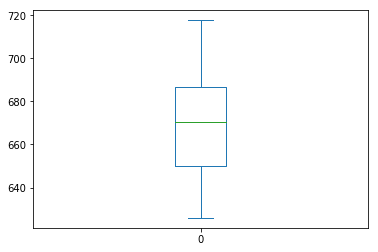

In [68]:
pd.DataFrame(cogs_forecasts).plot.box()

In [69]:
cogs_forecasts

[656.6666666666666,
 657.8888888888889,
 650.0,
 650.0,
 686.6666666666665,
 625.8888888888887,
 686.6666666666665,
 625.8888888888887,
 656.6666666666666,
 657.8888888888889,
 650.0,
 650.0,
 686.6666666666665,
 625.8888888888887,
 686.6666666666665,
 625.8888888888887,
 656.6666666666666,
 717.6969696969694,
 650.0,
 709.0909090909089,
 686.6666666666665,
 682.7878787878783,
 686.6666666666665,
 682.7878787878783,
 656.6666666666666,
 717.6969696969694,
 650.0,
 709.0909090909089,
 686.6666666666665,
 682.7878787878783,
 686.6666666666665,
 682.7878787878783]

In [70]:
df.loc['Sales']

2017-12-31    1000.0
2018-12-31    1200.0
2019-12-31    1100.0
Name: Sales, dtype: float64

In [71]:
df.loc['Sales'][last_date]

1100.0

In [72]:
last_date

Timestamp('2019-12-31 00:00:00')